In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
location= 'Data/properatti.csv'

df = pd.read_csv(location, index_col=0)

In [3]:
# Filtro sólo CABA y elmino los stores del tipo de propiedad
df = df[(df['property_type'].isin(['apartment','house','PH'])) & (df['state_name'] == 'Capital Federal')]

# Chequeo NaN
display(df.info())

# Saco las columnas operatcion y estado, ya que son columnas con un solo valor y sin NA (,'rooms')
df = df.drop(['lat-lon','floor','expenses','operation', 'state_name', 'lat','lon','place_with_parent_names', 'country_name', 'geonames_id','price','currency'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   30952 non-null  object 
 1   property_type               30952 non-null  object 
 2   place_name                  30952 non-null  object 
 3   place_with_parent_names     30952 non-null  object 
 4   country_name                30952 non-null  object 
 5   state_name                  30952 non-null  object 
 6   geonames_id                 29737 non-null  float64
 7   lat-lon                     22631 non-null  object 
 8   lat                         22631 non-null  float64
 9   lon                         22631 non-null  float64
 10  price                       27828 non-null  float64
 11  currency                    27828 non-null  object 
 12  price_aprox_local_currency  27828 non-null  float64
 13  price_aprox_usd             27

None

In [4]:
df['place_name'].value_counts()

Belgrano           2925
Palermo            2773
Caballito          2235
Villa Urquiza      1605
Recoleta           1453
                   ... 
Villa Real           36
Palermo Viejo        36
Villa Soldati        13
Villa Riachuelo       6
Catalinas             3
Name: place_name, Length: 62, dtype: int64

In [5]:
df.columns

Index(['property_type', 'place_name', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'rooms', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

## Features de "amenities"

In [6]:
def clasificarAmenities(dataset):
    ##esta funcion modifica el dataset de manera que agrega las columnas de amenities
    #inicializo columnas
    dataset['tiene_jardin'] = np.NaN
    dataset['tiene_cochera'] = np.NaN
    dataset['tiene_pileta'] = np.NaN
    dataset['tiene_parrilla'] = np.NaN
    
    ##regex
    #Expresiones regulares a utilizar
    re_jardin = re.compile("(jardin|garden|green|parque|parquizado|pasto)+|\s(sum)+", flags=re.IGNORECASE)
    re_cochera = re.compile("(garage|cochera)+|\s(sum)+", flags=re.IGNORECASE)
    re_pileta = re.compile("(pileta|piscina|pile)+|\s(sum)+", flags=re.IGNORECASE)
    re_parrilla = re.compile("(parrilla|bbq|barbaque|asado|asador)+|\s(sum)+", flags=re.IGNORECASE)
    
    #
    for i in dataset.description.index:
        
        dataset.tiene_jardin[i] = 0
        dataset.tiene_cochera[i] = 0
        dataset.tiene_pileta[i] = 0
        dataset.tiene_parrilla[i] = 0
        
        if dataset['description'][i] is not None:
            
            reg_search = re_jardin.search(str(dataset['description'][i]))
            if reg_search:
                dataset.tiene_jardin[i] = 1
                
            reg_search = re_cochera.search(str(dataset['description'][i]))
            if reg_search:
                dataset.tiene_cochera[i] = 1
                
            reg_search = re_pileta.search(str(dataset['description'][i]))
            if reg_search:
                dataset.tiene_pileta[i] = 1
                
            reg_search = re_parrilla.search(str(dataset['description'][i]))
            if reg_search:
                dataset.tiene_parrilla[i] = 1
                
                
        if dataset['title'][i] is not None:
            
            reg_search = re_jardin.search(str(dataset['title'][i]))
            if reg_search:
                dataset.tiene_jardin[i] = 1
                
            reg_search = re_cochera.search(str(dataset['title'][i]))
            if reg_search:
                dataset.tiene_cochera[i] = 1
                
            reg_search = re_pileta.search(str(dataset['title'][i]))
            if reg_search:
                dataset.tiene_pileta[i] = 1
                
            reg_search = re_parrilla.search(str(dataset['title'][i]))
            if reg_search:
                dataset.tiene_parrilla[i] = 1                
                
                              
        if dataset['properati_url'][i] is not None:
            
            reg_search = re_jardin.search(str(dataset['properati_url'][i]))
            if reg_search:
                dataset.tiene_jardin[i] = 1
                
            reg_search = re_cochera.search(str(dataset['properati_url'][i]))
            if reg_search:
                dataset.tiene_cochera[i] = 1
                
            reg_search = re_pileta.search(str(dataset['properati_url'][i]))
            if reg_search:
                dataset.tiene_pileta[i] = 1
                
            reg_search = re_parrilla.search(str(dataset['properati_url'][i]))
            if reg_search:
                dataset.tiene_parrilla[i] = 1                
                  
    return dataset            

In [7]:
clasificarAmenities(df)

C:\Users\alanp\AppData\Local\Temp/ipykernel_3728/3445030929.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.tiene_jardin[i] = 0
C:\Users\alanp\AppData\Local\Temp/ipykernel_3728/3445030929.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.tiene_cochera[i] = 0
C:\Users\alanp\AppData\Local\Temp/ipykernel_3728/3445030929.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.tiene_pileta[i] = 0
C:\Users\alanp\

,property_type,place_name,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,image_thumbnail,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla
0,PH,Mataderos,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,0.0,0.0,0.0,0.0
2,apartment,Mataderos,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.0,0.0,0.0,0.0
3,PH,Liniers,1676227.50,95000.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,0.0,0.0,0.0,0.0
7,apartment,Belgrano,2434941.00,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,0.0,0.0,1.0,0.0
8,apartment,Belgrano,3440677.50,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,apartment,Belgrano,7234245.00,410000.0,157.0,NaN,2611.464968,NaN,NaN,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,1.0,0.0,0.0,0.0
121209,apartment,Belgrano,7234245.00,410000.0,157.0,NaN,2611.464968,NaN,NaN,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,1.0,0.0,0.0,0.0
121215,apartment,Belgrano,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,NaN,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,0.0,1.0,1.0,1.0
121217,apartment,Villa Urquiza,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,0.0,1.0,0.0,1.0


## Columnas a agregar/eliminar

- Amenities: Booleano. Pileta, garage/cochera, parrilla, sum, garden/jardin
- Cuota: Booleano. Ver si sigue aplicando para planes, y si eliminamos o no.
- superficie: unificar los regex de los dos grupos
- Sup total y cubierta: Tomas buscará en los trabajos del resto. Julio había imputado esto, traer el código al nuevo dataset. Revisar le tema de las que tiene valores diferentes.
- rooms y ambientes: Ver los regex que se armaron, como aplican al nuevo dataset
- expensas por ahora se elimina
- Description y title: Se saca todos los datos y se elimina

## Agregado de columnas "ambientes", "cuota"e imputación de superficie

In [8]:
def superficie(df2):

    #regex para encontrar las diferentes características

    patron = '(?P<m2>\d\d\d+\s\s*m2|\d\d\d+\s\s*M2|\d\d\d+\s\s*metro|\d\d\d+\s\s*METRO)|(?P<ambiente>\d+\sambiente|\d+\sAMBIENTE|\d+\sAMB|\d+\samb|\d+\sAMBS|\d+\sambs)|(?P<balcon>balcon|BALCON)|(?P<planta_alta>planta\salta|PLANTA\sALTA)|(?P<patio>patio|PATIO)|(?P<duplex>duplex|DUPLEX)|(?P<cuota>cuota|CUOTA)|(?P<amenities>parrilla|bbq|barbaque|asado|asador|cochera|pileta|piscina|pile|patio|terraza|solarium|pile|jardin|garden|green|parque|parquizado|pasto)+|\s(sum)+'
    patron_regex = re.compile(patron)
    patron_match = df2.description.apply(lambda x : patron_regex.search(str(x)))

    # Extrae los metros cuadrados de la descripción, luego extrae el número (sin unidad) y posteriormente elimina aquellos menores que 3 para que no tome por error el número 2 de la unidad de medida
    # Genera una serie m2

    m2 = patron_match.apply(lambda x: x if x is None else x.group('m2'))
    patron_num = '\d+'
    patron_num_regex = re.compile(patron_num)
    m2 = m2.apply(lambda x: x if x is None else patron_num_regex.findall(x))
    # Extrae solo el valor de la superficie, evitando considerar el 2 de "m2"
    m2 = m2.apply(lambda x: x if x is None else x[0])
    m2 = pd.to_numeric(m2)
    m2 = m2.apply(lambda x: x if x is None else (None if x<3 else x))

    # Extrae la cantidad de ambientes, de la descripción, luego extrae el número (sin unidad) y posteriormente elimina aquellos menores que 3 para que no tome por error el número 2 de la unidad de medida
    # Genera una serie ambientes

    ambientes = patron_match.apply(lambda x: x if x is None else x.group('ambiente'))
    ambientes = ambientes.apply(lambda x: x if x is None else x[0])
    ambientes = pd.to_numeric(ambientes)


    # Extrae la cantidad de ambientes, balcón, patio, duplex, y planta alta y amenities de la descripción. Genera una serie booleana

    #balcon = patron_match.apply(lambda x: x if x is None else x.group('balcon'))
    #balcon = balcon.apply(lambda x: False if x is None else True)

    #patio = patron_match.apply(lambda x: x if x is None else x.group('patio'))
    #patio = patio.apply(lambda x: False if x is None else True)

    #duplex = patron_match.apply(lambda x: x if x is None else x.group('duplex'))
    #duplex = duplex.apply(lambda x: False if x is None else True)

    #planta_alta = patron_match.apply(lambda x: x if x is None else x.group('planta_alta'))
    #planta_alta = planta_alta.apply(lambda x: False if x is None else True)

    #amenities = patron_match.apply(lambda x: x if x is None else x.group('amenities'))
    #amenities = amenities.apply(lambda x: False if x is None else True)

    cuota = patron_match.apply(lambda x: x if x is None else x.group('cuota'))
    cuota = cuota.apply(lambda x: 0 if x is None else 1)
    
    df2['sup_m2_re'] = m2
    df2['ambientes'] = ambientes
    df2['cuota'] = cuota
    
    return df2

In [9]:
df = superficie(df)

In [10]:
#Unificación rooms y ambientes
def unif_rooms_amb(data):
    for i in data.index:
        if pd.isna(data.loc[i, 'rooms']) & pd.notna(data.loc[i, 'ambientes']):
            data.loc[i, 'rooms'] = data.loc[i, 'ambientes']
    
    return data

In [11]:
unif_rooms_amb(df)

,property_type,place_name,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,image_thumbnail,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla,sup_m2_re,ambientes,cuota
0,PH,Mataderos,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,2.0,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,0.0,0.0,0.0,0.0,NaN,2.0,0
2,apartment,Mataderos,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,2.0,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.0,0.0,0.0,0.0,NaN,2.0,0
3,PH,Liniers,1676227.50,95000.0,NaN,NaN,NaN,NaN,3.0,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,0.0,0.0,0.0,0.0,NaN,3.0,0
7,apartment,Belgrano,2434941.00,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,0.0,0.0,1.0,0.0,NaN,NaN,0
8,apartment,Belgrano,3440677.50,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,0.0,0.0,1.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,apartment,Belgrano,7234245.00,410000.0,157.0,NaN,2611.464968,NaN,NaN,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,1.0,0.0,0.0,0.0,NaN,NaN,0
121209,apartment,Belgrano,7234245.00,410000.0,157.0,NaN,2611.464968,NaN,NaN,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,1.0,0.0,0.0,0.0,NaN,NaN,0
121215,apartment,Belgrano,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,NaN,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,0.0,1.0,1.0,1.0,NaN,NaN,0
121217,apartment,Villa Urquiza,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,0.0,1.0,0.0,1.0,NaN,NaN,0


---
---
---
# Generación del df2

In [164]:
df2 = df.copy()

In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         25372 non-null  float64
 5   surface_covered_in_m2       28800 non-null  float64
 6   price_usd_per_m2            22519 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   rooms                       21652 non-null  float64
 9   properati_url               30952 non-null  object 
 10  description                 30952 non-null  object 
 11  title                       30952 non-null  object 
 12  image_thumbnail             30477 non-null  object 
 13  tiene_jardin                30

In [166]:
mask_sup_cov = (df2['sup_m2_re'].notna()) & (df2['surface_covered_in_m2'].isna())
mask_sup_cov.sum()

82

In [167]:
# Función que completa datos faltantes de superficie con datos extraídos de la descripción.
def compl_m2_re (row):
    if row['surface_covered_in_m2']>=0:
        result = row['surface_covered_in_m2']
    else:
        result = row['sup_m2_re']
    return result

df2['surface_covered_in_m2'] = df2.apply(compl_m2_re, axis = 1)

In [168]:
# Verifico si se imputaron correctamente.

df2['surface_covered_in_m2'].notnull().sum()

28882

In [169]:
# Determinar la cantidad de filas que pueden tener invertidas los datos de superficie cubierta con superficie total

sup_mask = df2['surface_covered_in_m2'] > df2['surface_total_in_m2']
print(f'Cantidad de filas con sup_cov > sup_total {sup_mask.sum()}')

Cantidad de filas con sup_cov > sup_total 131


In [170]:
# Función para corregir los valores invertidos de superficie cubierta y superficie total

df2['surface_covered_in_m2_aux'] = df2['surface_covered_in_m2']

def invertir_sup_cov (row):
    if (row['surface_covered_in_m2'] > row['surface_total_in_m2']):
        return row['surface_total_in_m2']
    else:
        return row['surface_covered_in_m2']

def invertir_sup_tot (row):
    if (row['surface_covered_in_m2'] == row['surface_total_in_m2']):
        return row['surface_covered_in_m2_aux']
    else:
        return row['surface_total_in_m2'] 
    
df2.loc[sup_mask,'surface_covered_in_m2'] = df2.apply(invertir_sup_tot, axis=1)
df2.loc[sup_mask,'surface_total_in_m2']  = df2.apply(invertir_sup_tot, axis=1)

In [171]:
df2.columns

Index(['property_type', 'place_name', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'rooms', 'properati_url',
       'description', 'title', 'image_thumbnail', 'tiene_jardin',
       'tiene_cochera', 'tiene_pileta', 'tiene_parrilla', 'sup_m2_re',
       'ambientes', 'cuota', 'surface_covered_in_m2_aux'],
      dtype='object')

In [172]:
# Imputo los valores de superficie cubierta y total, considerando que si tengo uno solo de los dos, son el mismo valor

# Imputo superficie total con los datos de cuubierta
mask_sup_cov = (df2['surface_covered_in_m2'].notna()) & (df2['surface_total_in_m2'].isna())
print('Datos a imputar en sup_total: ',mask_sup_cov.sum())

def compl_m2_cub (row):
    if row['surface_total_in_m2']>=0:
        result = row['surface_total_in_m2']
    else:
        result = row['surface_covered_in_m2']
    return result

df2['surface_total_in_m2'] = df2.apply(compl_m2_cub, axis = 1)
display(df2.info())

# Imputo superficie cubierta con los datos de total
mask_sup_cov = (df2['surface_total_in_m2'].notna()) & (df2['surface_covered_in_m2'].isna())
print('Datos a imputar en sup_cubierta: ',mask_sup_cov.sum())

def compl_m2_tot (row):
    if row['surface_covered_in_m2']>=0:
        result = row['surface_covered_in_m2']
    else:
        result = row['surface_total_in_m2']
    return result

df2['surface_covered_in_m2'] = df2.apply(compl_m2_tot, axis = 1)
display(df2.info())

Datos a imputar en sup_total:  4887
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         30259 non-null  float64
 5   surface_covered_in_m2       28882 non-null  float64
 6   price_usd_per_m2            22519 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   rooms                       21652 non-null  float64
 9   properati_url               30952 non-null  object 
 10  description                 30952 non-null  object 
 11  title                       30952 non-null  object 
 12  image_thumbnail             30477 non-null  object 

None

Datos a imputar en sup_cubierta:  1377
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         30259 non-null  float64
 5   surface_covered_in_m2       30259 non-null  float64
 6   price_usd_per_m2            22519 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   rooms                       21652 non-null  float64
 9   properati_url               30952 non-null  object 
 10  description                 30952 non-null  object 
 11  title                       30952 non-null  object 
 12  image_thumbnail             30477 non-null  obje

None

In [173]:
# Elimino la columna auxiliar generada

df2.drop('surface_covered_in_m2_aux', axis=1, inplace=True)
df2.drop('sup_m2_re', axis=1, inplace=True)
#df2.drop('ambientes', axis=1, inplace=True)

In [174]:
# Verificación de la corrección de cambio de columnas e imputación.

sup_mask = df2['surface_covered_in_m2'] > df2['surface_total_in_m2']
print(f'Cantidad de filas con sup_cov > sup_total {sup_mask.sum()}')
display(df2.info())

Cantidad de filas con sup_cov > sup_total 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         30259 non-null  float64
 5   surface_covered_in_m2       30259 non-null  float64
 6   price_usd_per_m2            22519 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   rooms                       21652 non-null  float64
 9   properati_url               30952 non-null  object 
 10  description                 30952 non-null  object 
 11  title                       30952 non-null  object 
 12  image_thumbnail             30477 non-null 

None

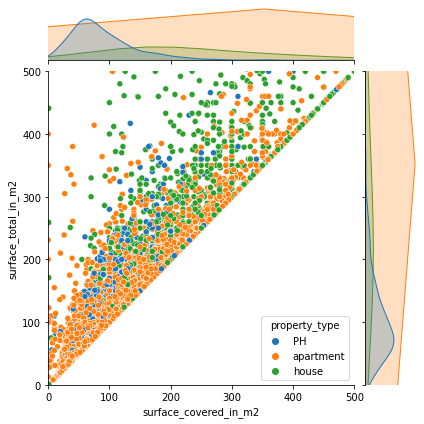

In [175]:
 sns.jointplot(x='surface_covered_in_m2', y='surface_total_in_m2',data=df2, hue='property_type',xlim=(0,500), ylim=(0,500))

In [176]:
display(df2.columns)
df2.head()

Index(['property_type', 'place_name', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'rooms', 'properati_url',
       'description', 'title', 'image_thumbnail', 'tiene_jardin',
       'tiene_cochera', 'tiene_pileta', 'tiene_parrilla', 'ambientes',
       'cuota'],
      dtype='object')

,property_type,place_name,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,image_thumbnail,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla,ambientes,cuota
0,PH,Mataderos,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,2.0,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,0.0,0.0,0.0,0.0,2.0,0
2,apartment,Mataderos,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,2.0,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.0,0.0,0.0,0.0,2.0,0
3,PH,Liniers,1676227.5,95000.0,NaN,NaN,NaN,NaN,3.0,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,0.0,0.0,0.0,0.0,3.0,0
7,apartment,Belgrano,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,0.0,0.0,1.0,0.0,NaN,0
8,apartment,Belgrano,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,0.0,0.0,1.0,0.0,NaN,0


In [177]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         30259 non-null  float64
 5   surface_covered_in_m2       30259 non-null  float64
 6   price_usd_per_m2            22519 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   rooms                       21652 non-null  float64
 9   properati_url               30952 non-null  object 
 10  description                 30952 non-null  object 
 11  title                       30952 non-null  object 
 12  image_thumbnail             30477 non-null  object 
 13  tiene_jardin                30

## Conversion de pasos a dolares

Tipo de cambio promedio entre entre 'price_aprox_local_currency' y 'price_aprox_usd':  17.64 $/USD 

In [178]:
def estimar_tipo_de_cambio(data):
    #'Esta función estima el tipo de cambio promedio entre 'price_aprox_local_currency' y 'price_aprox_usd'
    mask_tipo_de_cambio = (data['price_aprox_local_currency'].notnull() & data['price_aprox_usd'].notnull())
    calculo_tipo_de_cambio = data.loc[mask_tipo_de_cambio, 'price_aprox_local_currency'] / data.loc[mask_tipo_de_cambio, 'price_aprox_usd']
    tipo_de_cambio = calculo_tipo_de_cambio.mean()
    valor = round(tipo_de_cambio, 2)
    return valor


In [179]:
valor_dolar = estimar_tipo_de_cambio(df2)
print(valor_dolar)

17.64


In [180]:
def calculo_valor_total_pesos_dolar(dataframe, valor_dolar):
    #precio m2 en pesos a precio m2 en dolares
    for i in dataframe.index:
        if pd.isna(dataframe.loc[i, 'price_usd_per_m2']):
            dataframe.loc[i, 'price_usd_per_m2'] = dataframe.loc[i, 'price_per_m2'] / valor_dolar
    
    return dataframe

In [181]:
df2 = calculo_valor_total_pesos_dolar(df2, valor_dolar)

In [182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               30952 non-null  object 
 1   place_name                  30952 non-null  object 
 2   price_aprox_local_currency  27828 non-null  float64
 3   price_aprox_usd             27828 non-null  float64
 4   surface_total_in_m2         30259 non-null  float64
 5   surface_covered_in_m2       30259 non-null  float64
 6   price_usd_per_m2            27307 non-null  float64
 7   price_per_m2                26276 non-null  float64
 8   rooms                       21652 non-null  float64
 9   properati_url               30952 non-null  object 
 10  description                 30952 non-null  object 
 11  title                       30952 non-null  object 
 12  image_thumbnail             30477 non-null  object 
 13  tiene_jardin                30

In [183]:
#Dropeo todas las features que necesitan tratamiento previo para servir
df2 = df2.drop(['description','title','image_thumbnail','price_per_m2','properati_url', 'price_aprox_local_currency', 'ambientes'], axis=1)

In [184]:
df2 = df2.dropna()

In [185]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20003 entries, 0 to 121138
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          20003 non-null  object 
 1   place_name             20003 non-null  object 
 2   price_aprox_usd        20003 non-null  float64
 3   surface_total_in_m2    20003 non-null  float64
 4   surface_covered_in_m2  20003 non-null  float64
 5   price_usd_per_m2       20003 non-null  float64
 6   rooms                  20003 non-null  float64
 7   tiene_jardin           20003 non-null  float64
 8   tiene_cochera          20003 non-null  float64
 9   tiene_pileta           20003 non-null  float64
 10  tiene_parrilla         20003 non-null  float64
 11  cuota                  20003 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 2.0+ MB


In [186]:
# Eliminamos todos los barrios con menos de 250 entradas
group_place_name = df2.groupby('place_name')['place_name'].count()
lista_barrios = []

for x in group_place_name.index:
    if group_place_name[x]>250:
        lista_barrios.append(x)
# list = [x for x in group_place_name.index if group_place_name[x]>250]


df2 = df2[df2['place_name'].isin(lista_barrios)]

## Mascaras booleanas para eliminar outliers

In [187]:
df2 = df2[(df2['price_usd_per_m2'] < df2['price_usd_per_m2'].quantile(0.99))&\
          (df2['surface_total_in_m2'] < df2['surface_total_in_m2'].quantile(0.99))&\
          (df2['price_aprox_usd'] < df2['price_aprox_usd'].quantile(0.99))]

In [188]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15686 entries, 19 to 121138
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          15686 non-null  object 
 1   place_name             15686 non-null  object 
 2   price_aprox_usd        15686 non-null  float64
 3   surface_total_in_m2    15686 non-null  float64
 4   surface_covered_in_m2  15686 non-null  float64
 5   price_usd_per_m2       15686 non-null  float64
 6   rooms                  15686 non-null  float64
 7   tiene_jardin           15686 non-null  float64
 8   tiene_cochera          15686 non-null  float64
 9   tiene_pileta           15686 non-null  float64
 10  tiene_parrilla         15686 non-null  float64
 11  cuota                  15686 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 1.6+ MB


## Test modelado básico

In [189]:
# importo los librerías para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import metrics

In [190]:
df2.property_type.value_counts()

apartment    14351
PH             907
house          428
Name: property_type, dtype: int64

### Modelado SOLO con place_name y property_type y sin stratify

In [191]:
# Selecciono las columnas que considero features para modelar 
X = df2.loc[:,['property_type','place_name', 'rooms']]
y = df2['price_usd_per_m2']

# Convierto a dummies las categóricas
X = pd.get_dummies(X,drop_first=True)

# Separo en train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33)

X.shape, y.shape, X_train.shape,X_test.shape, y_train.shape, y_test.shape

((15686, 26), (15686,), (11764, 26), (3922, 26), (11764,), (3922,))

In [192]:
df2.price_usd_per_m2.isna().sum()

0

In [193]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

rcv.fit(X_train,y_train)
print('intercept: ',rcv.intercept_,'coef: ', rcv.coef_,'alpha: ', rcv.alpha_)

y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

intercept:  1805.9784588781486 coef:  [ -125.44663494   848.52424299   -23.3680375   -730.43029735
  -395.45237015   431.82861982   286.42312488  6703.06161074
  -234.98497499  -324.9965397   -574.32709187  -792.32197893
 -1261.5009384   -122.85532264   156.96968273   780.80519451
  2412.45998221   505.95120515  -509.40376448  3165.41822405
  -511.85614943   -44.76418375  -350.77529584  -488.15155391
  -213.43998796  -275.82429763] alpha:  1.0


0.30970158883525145

In [194]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.5,1,2,3,4), cv=5)

rcv.fit(X_train,y_train)
print('intercept: ',rcv.intercept_,'coef: ', rcv.coef_,'alpha: ', rcv.alpha_)

y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

intercept:  1844.119253907385 coef:  [ -126.80546217   846.28195724   -23.41483796  -756.4364003
  -421.6674929    398.07591063   253.74375261  6631.40896027
  -266.7100379   -351.98898583  -603.9680945   -814.2222248
 -1277.82841635  -153.88969915   124.46069697   738.50861644
  2352.08774185   472.77770967  -535.71292007  3102.60289789
  -541.40360084   -76.84713459  -377.34429556  -513.61503266
  -244.89016802  -304.66249747] alpha:  4.0


0.3096262111575223

In [162]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(3.8,4,4.5,5,6,7), cv=5)

rcv.fit(X_train,y_train)
print('intercept: ',rcv.intercept_,'coef: ', rcv.coef_,'alpha: ', rcv.alpha_)

y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

intercept:  1663.5884390574217 coef:  [ -100.59566689   751.72125414   -83.74164023  -542.54169811
  -193.87167398   558.00622525   441.19518727  4725.83134172
  -101.08579347   -32.05552939  -417.68637939  -649.06065448
 -1060.69767877   134.88667502   383.67806452   959.94959805
  2307.23587856   660.26521421  -275.92114672  1659.55144938
  -273.41131126    81.94635982  -139.4439175   -231.484466
   -66.51908638   -60.35426293] alpha:  5.0


0.24905642740804068

## Modelado Regresión Lineal pre-estandarización 

In [46]:
# Selecciono las columnas que considero features para modelar 
X = df2.loc[:,['property_type','place_name','tiene_cochera','tiene_pileta','tiene_parrilla','cuota',\
               'surface_total_in_m2', 'surface_covered_in_m2','rooms' ]]
y = df2['price_usd_per_m2']

# Convierto a dummies las categóricas
X = pd.get_dummies(X,drop_first=True)

# Separo en train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33)

X.shape, y.shape, X_train.shape,X_test.shape, y_train.shape, y_test.shape

((15634, 32), (15634,), (11725, 32), (3909, 32), (11725,), (3909,))

In [47]:
lr = LinearRegression()

lr.fit(X_train,y_train)
lr.intercept_, lr.coef_

(1282.121281866111,
 array([ 1.42245123e+02,  1.00674136e+03, -4.68256888e+01,  1.13387621e+03,
         4.42950452e+00, -6.47402158e+00,  7.66348269e-02,  7.87543312e+02,
         1.19308324e+01, -4.72113505e+02, -3.71177526e+02,  5.23956172e+02,
         2.01281231e+02,  5.44892487e+03, -2.85108922e+02, -4.07346521e+02,
        -5.94621323e+02, -5.83947979e+02, -1.21900102e+03, -1.07114683e+02,
         1.37042273e+02,  4.48670518e+02,  2.19085500e+03,  7.64688530e+02,
        -6.07979447e+02,  2.93168318e+03, -6.83471128e+02,  2.02036932e+01,
        -2.62350254e+02, -4.16328509e+02, -4.33078678e+02, -3.74783355e+02]))

In [48]:
y_pred = lr.predict(X_test)

metrics.r2_score(y_test, y_pred)

0.37631775090560915

## Ridge pre-escalado

In [49]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

rcv.fit(X_train,y_train)
rcv.intercept_, rcv.coef_, rcv.alpha_

(1292.8083660773275,
 array([ 1.42699332e+02,  1.00782500e+03, -4.64115482e+01,  1.13631562e+03,
         4.42012377e+00, -6.45076292e+00, -4.59117401e-01,  7.86018941e+02,
         1.01857612e+01, -4.79723234e+02, -3.78737340e+02,  5.13818417e+02,
         1.91543532e+02,  5.42724832e+03, -2.94349595e+02, -4.15024315e+02,
        -6.03144126e+02, -5.90449236e+02, -1.22333973e+03, -1.16430514e+02,
         1.27429427e+02,  4.36813550e+02,  2.17236752e+03,  7.54487967e+02,
        -6.15164566e+02,  2.91242460e+03, -6.91732110e+02,  1.10616735e+01,
        -2.70291657e+02, -4.23504638e+02, -4.42143239e+02, -3.82612074e+02]),
 1.0)

In [50]:
y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

0.3761553712989161

In [51]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.5,1,2,2.5), cv=5)

rcv.fit(X_train,y_train)
rcv.intercept_, rcv.coef_, rcv.alpha_

(1307.5297129188311,
 array([ 1.43369958e+02,  1.00938654e+03, -4.57907842e+01,  1.13995881e+03,
         4.40636061e+00, -6.41679477e+00, -1.25126473e+00,  7.83773683e+02,
         7.61871316e+00, -4.89786891e+02, -3.88648246e+02,  4.99976666e+02,
         1.78279342e+02,  5.39622162e+03, -3.06876691e+02, -4.25103227e+02,
        -6.14586346e+02, -5.98822292e+02, -1.22848305e+03, -1.28993400e+02,
         1.14347214e+02,  4.20528261e+02,  2.14623940e+03,  7.40536851e+02,
        -6.24535361e+02,  2.88506754e+03, -7.02747848e+02, -1.31884904e+00,
        -2.80764404e+02, -4.32856813e+02, -4.54383681e+02, -3.92948647e+02]),
 2.5)

In [52]:
y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

0.37590691822725186

## Lasso pre-escalado

In [53]:
#prueba con crossvalidation con Lasso
lcv = LassoCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

lcv.fit(X_train,y_train)
lcv.intercept_, lcv.coef_, lcv.alpha_

(1274.1110212487501,
 array([ 1.41988540e+02,  1.00612941e+03, -4.55442655e+01,  1.13293992e+03,
         4.42095659e+00, -6.45601047e+00, -1.55823423e-02,  7.85411645e+02,
         3.27103082e+00, -4.59341999e+02, -3.55799487e+02,  5.31473906e+02,
         2.09981702e+02,  5.45689474e+03, -2.74369207e+02, -3.91845505e+02,
        -5.82877986e+02, -5.69046883e+02, -1.20436062e+03, -9.36184966e+01,
         1.45694071e+02,  4.53032114e+02,  2.19608759e+03,  7.72678495e+02,
        -5.93280751e+02,  2.93768131e+03, -6.71066298e+02,  2.82622477e+01,
        -2.46096847e+02, -4.00640727e+02, -4.21637022e+02, -3.60196365e+02]),
 0.1)

In [54]:
y_pred_lcv = lcv.predict(X_test)

metrics.r2_score(y_test, y_pred_lcv)

0.3762824496993946

In [55]:
#prueba con crossvalidation con Lasso
lcv = LassoCV(alphas=(0.05,0.1,0.15), cv=5)

lcv.fit(X_train,y_train)
lcv.intercept_, lcv.coef_, lcv.alpha_

(1269.8350290290173,
 array([ 1.41839231e+02,  1.00582150e+03, -4.49087672e+01,  1.13247247e+03,
         4.41685808e+00, -6.44794326e+00, -5.30032263e-02,  7.84657697e+02,
         0.00000000e+00, -4.52949743e+02, -3.48094254e+02,  5.35241443e+02,
         2.14339817e+02,  5.46086533e+03, -2.69001547e+02, -3.84087821e+02,
        -5.77027097e+02, -5.61608076e+02, -1.19703143e+03, -8.68729664e+01,
         1.50028979e+02,  4.55224620e+02,  2.19875055e+03,  7.76690227e+02,
        -5.85943844e+02,  2.94069055e+03, -6.64868705e+02,  3.22911336e+01,
        -2.38024443e+02, -3.92813380e+02, -4.15916698e+02, -3.52911946e+02]),
 0.15)

## Portfolio de Departamentos sin estandarizar

Usar la variable 'y_pred' para conseguir la columna 'price_usd_per_m2_predic'

In [56]:
X_port = df2.loc[:,['property_type','place_name','tiene_cochera','tiene_pileta','tiene_parrilla','cuota',\
               'surface_total_in_m2', 'surface_covered_in_m2','rooms' ]]

# Convierto a dummies las categóricas
X_port = pd.get_dummies(X_port,drop_first=True)
X_port

,tiene_cochera,tiene_pileta,tiene_parrilla,cuota,surface_total_in_m2,surface_covered_in_m2,rooms,property_type_apartment,property_type_house,place_name_Balvanera,...,place_name_Puerto Madero,place_name_Recoleta,place_name_Saavedra,place_name_San Cristobal,place_name_San Telmo,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa Luro,place_name_Villa Urquiza,place_name_Villa del Parque
19,0.0,0.0,0.0,0,104.0,96.0,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0.0,0.0,0.0,0,118.0,73.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0.0,0.0,0.0,0,43.0,43.0,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0.0,0.0,0.0,0,80.0,77.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
48,1.0,0.0,0.0,0,141.0,124.0,5.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121077,1.0,0.0,0.0,0,70.0,30.0,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121094,1.0,0.0,0.0,0,84.0,81.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121113,1.0,1.0,1.0,0,100.0,88.0,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121131,0.0,0.0,0.0,0,113.0,113.0,4.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
rcv.fit(X_port,y)
rcv.intercept_, rcv.coef_, rcv.alpha_

(1427.9566467401996,
 array([ 1.38538513e+02,  9.94235465e+02, -2.87725683e+01,  9.01930211e+02,
         4.12141298e+00, -6.44232285e+00, -1.54440809e+00,  7.33517152e+02,
        -1.52821821e+01, -5.63735310e+02, -4.00723263e+02,  4.34577950e+02,
         1.25819640e+02,  5.78456279e+03, -3.68181059e+02, -3.99109458e+02,
        -6.34143729e+02, -7.25422167e+02, -1.29349739e+03, -1.84287820e+02,
         6.23747889e+01,  4.03454155e+02,  2.11805873e+03,  6.63033431e+02,
        -5.94157500e+02,  3.06149269e+03, -7.30230982e+02, -6.16205735e+01,
        -3.42671663e+02, -4.17973690e+02, -4.75339449e+02, -4.81629379e+02]),
 2.5)

In [58]:
# Se calcula el precio por m2 a partir de la predicción de Lasso post-escalado

price_usd_per_m2_predic = lcv.predict(X_port)
price_usd_per_m2_predic

array([2044.71338225, 2254.79908718, 1390.02296022, ..., 3181.38145875,
       2601.45831453, 2347.24221971])

In [59]:
# Seleccionar mediante muestreo aleatorio simple una submuestra de 100 (cambiar la columna seleccionada por la columna 
# del modelo, utilicé el precio aproximado en usd ya que posteriormente vamos a estimar un precio en función del precio/m2 
# y la superficie)
df_port = df2.copy()
portafolio = df_port['price_aprox_usd'].sample(100)
portafolio

# Determinar capital inicial

cap_inicial = portafolio.sum()
print('Nuestro capital inicial es: ', cap_inicial)
#display(df_port.loc[:,'price_usd_per_m2'])
#Se agrega la columna predicha al DF
df_port.loc[:,'price_usd_per_m2_predic'] = price_usd_per_m2_predic

# Determinar el error del precio de las propiedades 

# Se crea una columna con el precio de predicción
# (Cambiar los nombres de las columnas por los nombres de las columnas del modelo)
df_port.loc[:,'price_aprox_usd_predic'] = df_port.apply((lambda row: row['price_usd_per_m2_predic']*row['surface_total_in_m2']), axis=1)

# Se crea una columna con la diferencia entre el precio real y el precio estimado por el modelos. 
# Se normaliza el error dividiendo por el precio real (cambiar los nombres de las variables)

df_port.loc[:,'error_normalizado'] = df_port.apply((lambda row: (row['price_aprox_usd_predic']-row['price_aprox_usd'])/row['price_aprox_usd']), axis=1)

# Se genera una máscara con los índice de las 100 propiedades que más se alejan del valor predicho, con diferencia negativa
menor_error_mask= df_port['error_normalizado'].sort_values(ascending=False).index

# Se crea una columna auxiliar con los valores de las propiedades predichas ordenadas de menor a mayor.
prop_menor_precio = df_port.loc[menor_error_mask,'price_aprox_usd_predic']

# Creo una variable y voy sumando el precio de las propiedades más baratas hasta llegar al valor de capital inicial, se cuenta la cantidad de propiedades que se pueden comprar
cap_menor = 0
cant_prop = 0

for x in prop_menor_precio.index:
    if cap_menor < cap_inicial:
        cap_menor = cap_menor + x
        cant_prop = cant_prop + 1

cap_menor = cap_menor - prop_menor_precio.iloc[cant_prop]
cant_prop = cant_prop-1
    
print(f'La cantidad de propiedades que se puede comprar es {cant_prop}, el capital necesario es {cap_menor}')

Nuestro capital inicial es:  25514178.46
La cantidad de propiedades que se puede comprar es 551, el capital necesario es 25196463.22917028


<AxesSubplot:xlabel='price_usd_per_m2', ylabel='price_usd_per_m2_predic'>

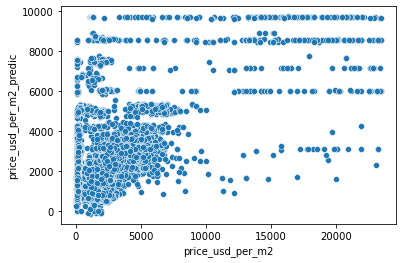

In [60]:
#superficie total contra precio de la propiedad.
sns.scatterplot(data=df_port, x='price_usd_per_m2', y='price_usd_per_m2_predic')


## MinMaxScaler

In [61]:
from sklearn.preprocessing import MinMaxScaler
numericals = ['surface_total_in_m2','surface_covered_in_m2', 'rooms']

Z = df2[numericals]

scaler = MinMaxScaler()
scaler.fit(Z)

std_numerical_data = scaler.transform(Z)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
df_esc = pd.concat([df2, std_df.set_index(df2.index)], axis=1)
df_esc


,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla,cuota,surface_total_in_m2_std,surface_covered_in_m2_std,rooms_std
19,apartment,Palermo,350000.0,104.0,96.0,3365.384615,3.0,1.0,0.0,0.0,0.0,0,0.261421,0.327645,0.250000
21,apartment,Palermo,270500.0,118.0,73.0,2292.372881,4.0,0.0,0.0,0.0,0.0,0,0.296954,0.249147,0.333333
29,apartment,Flores,75000.0,43.0,43.0,1744.186047,2.0,0.0,0.0,0.0,0.0,0,0.106599,0.146758,0.166667
35,apartment,Boedo,145000.0,80.0,77.0,1812.500000,4.0,0.0,0.0,0.0,0.0,0,0.200508,0.262799,0.333333
48,apartment,Balvanera,240000.0,141.0,124.0,1702.127660,5.0,1.0,1.0,0.0,0.0,0,0.355330,0.423208,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121077,apartment,Belgrano,170000.0,70.0,30.0,2428.571429,2.0,0.0,1.0,0.0,0.0,0,0.175127,0.102389,0.166667
121094,apartment,Belgrano,218000.0,84.0,81.0,2595.238095,4.0,0.0,1.0,0.0,0.0,0,0.210660,0.276451,0.333333
121113,apartment,Palermo,265000.0,100.0,88.0,2650.000000,3.0,1.0,1.0,1.0,1.0,0,0.251269,0.300341,0.250000
121131,apartment,Recoleta,325000.0,113.0,113.0,2876.106195,4.0,0.0,0.0,0.0,0.0,0,0.284264,0.385666,0.333333


In [62]:
df_esc['place_name'].value_counts()

Palermo              1614
Belgrano             1562
Caballito            1527
Recoleta              983
Villa Crespo          915
Villa Urquiza         908
Flores                876
Almagro               805
Barrio Norte          750
Boedo                 705
San Telmo             614
Balvanera             499
Nuñez                 443
San Cristobal         410
Puerto Madero         385
Villa del Parque      349
Floresta              317
Saavedra              310
Palermo Hollywood     304
Monserrat             291
Villa Luro            275
Barracas              275
Villa Devoto          260
Colegiales            257
Name: place_name, dtype: int64

In [63]:
group_place_name.index

Index(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Capital Federal', 'Catalinas', 'Centro / Microcentro', 'Chacarita',
       'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores',
       'Floresta', 'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat',
       'Monte Castro', 'Nuñez', 'Once', 'Palermo', 'Palermo Chico',
       'Palermo Hollywood', 'Palermo Soho', 'Palermo Viejo',
       'Parque Avellaneda', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Chas', 'Parque Patricios', 'Paternal', 'Pompeya',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal',
       'San Nicolás', 'San Telmo', 'Tribunales', 'Velez Sarsfield',
       'Versalles', 'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
       'Villa Urquiz

In [64]:
df_esc.columns

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'tiene_jardin',
       'tiene_cochera', 'tiene_pileta', 'tiene_parrilla', 'cuota',
       'surface_total_in_m2_std', 'surface_covered_in_m2_std', 'rooms_std'],
      dtype='object')

## Modelado Regresión Lineal post-estandarización 

In [65]:
# Selecciono las columnas que considero features para modelar 
X = df_esc.loc[:,['property_type','place_name','tiene_cochera','tiene_pileta','tiene_parrilla', 'surface_total_in_m2_std', 'rooms_std' ]]
y = df_esc['price_usd_per_m2']

# Convierto a dummies las categóricas
X = pd.get_dummies(X,drop_first=True)

# Separo en train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33)

X.shape, y.shape, X_train.shape,X_test.shape, y_train.shape, y_test.shape

((15634, 30), (15634,), (11725, 30), (3909, 30), (11725,), (3909,))

In [66]:
lr = LinearRegression()

lr.fit(X_train,y_train)
lr.intercept_, lr.coef_

(1436.3732987010324,
 array([ 1.49522721e+02,  1.00914064e+03, -1.59604618e+00, -1.19403413e+02,
        -6.09652560e+02,  7.45796934e+02, -5.12477104e+01, -5.38010792e+02,
        -4.35722787e+02,  4.50112887e+02,  1.30524397e+02,  5.79613471e+03,
        -3.62103754e+02, -4.65259476e+02, -5.95689281e+02, -6.34189738e+02,
        -1.33779435e+03, -1.49595330e+02,  5.20264091e+01,  3.73672098e+02,
         2.02820957e+03,  6.96089172e+02, -6.63069596e+02,  2.96198389e+03,
        -7.80494986e+02,  2.37275105e+01, -3.33121111e+02, -4.81367101e+02,
        -4.85199548e+02, -4.25844644e+02]))

In [67]:
y_pred = lr.predict(X_test)

metrics.r2_score(y_test, y_pred)

0.37803530518428763

## Ridge post-escalado

In [68]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

rcv.fit(X_train,y_train)
rcv.intercept_, rcv.coef_, rcv.alpha_

(1443.680387389306,
 array([ 1.50054591e+02,  1.01032021e+03, -9.92848485e-01, -1.21279046e+02,
        -6.05875215e+02,  7.45065053e+02, -5.23026608e+01, -5.43998193e+02,
        -4.41302260e+02,  4.41607750e+02,  1.22357074e+02,  5.77667699e+03,
        -3.69814582e+02, -4.70994083e+02, -6.02589188e+02, -6.39108650e+02,
        -1.33984644e+03, -1.57106443e+02,  4.39648657e+01,  3.63522863e+02,
         2.01240613e+03,  6.87657684e+02, -6.68339041e+02,  2.94450825e+03,
        -7.86817228e+02,  1.60214839e+01, -3.39157754e+02, -4.86811036e+02,
        -4.92787745e+02, -4.32183937e+02]),
 1.0)

In [69]:
y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

0.3778663070251679

## Lasso post-escalado

In [70]:
#prueba con crossvalidation con Lasso
lcv = LassoCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

lcv.fit(X_train,y_train)
lcv.intercept_, lcv.coef_, lcv.alpha_

(1422.467555457841,
 array([ 1.48772755e+02,  1.00883263e+03, -3.45300835e-01, -1.17485053e+02,
        -6.01331691e+02,  7.48204314e+02, -4.87877035e+01, -5.25506421e+02,
        -4.20605189e+02,  4.57110750e+02,  1.38786194e+02,  5.80417349e+03,
        -3.51644913e+02, -4.49809060e+02, -5.84456791e+02, -6.19678762e+02,
        -1.32279742e+03, -1.36419429e+02,  6.03600891e+01,  3.78010743e+02,
         2.03304541e+03,  7.03426319e+02, -6.48513819e+02,  2.96812459e+03,
        -7.67979565e+02,  3.15387469e+01, -3.17739903e+02, -4.65986214e+02,
        -4.73911211e+02, -4.11690495e+02]),
 0.1)

In [71]:
y_pred_lcv = lcv.predict(X_test)

metrics.r2_score(y_test, y_pred_lcv, )

0.3779800583745282

## Portfolio de Departamentos

Usar la variable 'y_pred' para conseguir la columna 'price_usd_per_m2_predic'

In [72]:
X_port_st = df_esc.loc[:,['property_type','place_name','tiene_cochera','tiene_pileta','tiene_parrilla',\
                          'surface_total_in_m2_std', 'rooms_std' ]]

# Convierto a dummies las categóricas
X_port_st = pd.get_dummies(X_port_st,drop_first=True)


In [73]:
rcv.fit(X_port_st,y)
rcv.intercept_, rcv.coef_, rcv.alpha_

(2226.8971811883976,
 array([195.50232289, 414.45217162, 232.81689483, -51.07166323,
        -64.09493568, 119.94593064, -34.7411617 , -43.29654582,
        -19.98406341,  10.85060119, -13.30076873, 403.56530557,
        -83.71973856, -17.49471843, -77.75227376, -37.72288961,
        -45.26520838, -18.11187631, -29.15960307,   7.65483632,
         74.24696106,  29.93636963, -27.70654436, 115.59270753,
        -51.4659138 , -28.47022886, -21.75182257, -21.33537014,
        -59.86051345, -23.94260985]),
 10000.0)

In [74]:
# Se calcula el precio por m2 a partir de la predicción de Lasso post-escalado

price_usd_per_m2_predic_std = lcv.predict(X_port_st)
price_usd_per_m2_predic_std

array([2049.98593777, 1995.70036771, 1473.46934202, ..., 3208.43876735,
       2640.2575252 , 2410.14682568])

---
---
---
---
## Pruebas agregando conversiones de features

In [217]:
df_conv = df2[['property_type','place_name','surface_total_in_m2','rooms','tiene_jardin','tiene_cochera','tiene_pileta','tiene_parrilla','cuota','price_usd_per_m2']]

In [218]:
df_conv = df_conv.astype({'tiene_jardin':'boolean','tiene_cochera':'boolean','tiene_pileta':'boolean','tiene_parrilla':'boolean','cuota':'boolean'})
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15686 entries, 19 to 121138
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        15686 non-null  object 
 1   place_name           15686 non-null  object 
 2   surface_total_in_m2  15686 non-null  float64
 3   rooms                15686 non-null  float64
 4   tiene_jardin         15686 non-null  boolean
 5   tiene_cochera        15686 non-null  boolean
 6   tiene_pileta         15686 non-null  boolean
 7   tiene_parrilla       15686 non-null  boolean
 8   cuota                15686 non-null  boolean
 9   price_usd_per_m2     15686 non-null  float64
dtypes: boolean(5), float64(3), object(2)
memory usage: 888.5+ KB


In [219]:
df_conv.head()

,property_type,place_name,surface_total_in_m2,rooms,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla,cuota,price_usd_per_m2
19,apartment,Palermo,104.0,3.0,True,False,False,False,False,3365.384615
21,apartment,Palermo,118.0,4.0,False,False,False,False,False,2292.372881
29,apartment,Flores,43.0,2.0,False,False,False,False,False,1744.186047
35,apartment,Boedo,80.0,4.0,False,False,False,False,False,1812.500000
48,apartment,Balvanera,141.0,5.0,True,True,False,False,False,1702.127660


In [220]:
df_conv['sup_raiz_cuadrada'] = np.sqrt(df_conv['surface_total_in_m2'])
df_conv['sup_raiz_cubica'] = np.cbrt(df_conv['surface_total_in_m2'])

In [221]:
numericals = ['surface_total_in_m2','sup_raiz_cuadrada', 'sup_raiz_cubica']

Z = df_conv[numericals]

scaler = MinMaxScaler()
scaler.fit(Z)

std_numerical_data = scaler.transform(Z)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
df_conv = pd.concat([df_conv, std_df.set_index(df2.index)], axis=1)
df_conv

,property_type,place_name,surface_total_in_m2,rooms,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla,cuota,price_usd_per_m2,sup_raiz_cuadrada,sup_raiz_cubica,surface_total_in_m2_std,sup_raiz_cuadrada_std,sup_raiz_cubica_std
19,apartment,Palermo,104.0,3.0,True,False,False,False,False,3365.384615,10.198039,4.702669,0.260101,0.486029,0.583135
21,apartment,Palermo,118.0,4.0,False,False,False,False,False,2292.372881,10.862780,4.904868,0.295455,0.521155,0.614979
29,apartment,Flores,43.0,2.0,False,False,False,False,False,1744.186047,6.557439,3.503398,0.106061,0.293658,0.394261
35,apartment,Boedo,80.0,4.0,False,False,False,False,False,1812.500000,8.944272,4.308869,0.199495,0.419780,0.521115
48,apartment,Balvanera,141.0,5.0,True,True,False,False,False,1702.127660,11.874342,5.204828,0.353535,0.574606,0.662220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121077,apartment,Belgrano,70.0,2.0,False,True,False,False,False,2428.571429,8.366600,4.121285,0.174242,0.389255,0.491572
121094,apartment,Belgrano,84.0,4.0,False,True,False,False,False,2595.238095,9.165151,4.379519,0.209596,0.431451,0.532242
121113,apartment,Palermo,100.0,3.0,True,True,True,True,False,2650.000000,10.000000,4.641589,0.250000,0.475565,0.573515
121131,apartment,Recoleta,113.0,4.0,False,False,False,False,False,2876.106195,10.630146,4.834588,0.282828,0.508862,0.603911


In [222]:
df_conv = df_conv.drop(['surface_total_in_m2','sup_raiz_cuadrada','sup_raiz_cubica'], axis=1)

In [223]:
df_conv.columns

Index(['property_type', 'place_name', 'rooms', 'tiene_jardin', 'tiene_cochera',
       'tiene_pileta', 'tiene_parrilla', 'cuota', 'price_usd_per_m2',
       'surface_total_in_m2_std', 'sup_raiz_cuadrada_std',
       'sup_raiz_cubica_std'],
      dtype='object')

## Modelo

In [224]:
# Selecciono las columnas que considero features para modelar 
X = df_conv.loc[:,['property_type','place_name', 'rooms','tiene_jardin', 'tiene_cochera', 'tiene_pileta', 'tiene_parrilla', 'cuota','surface_total_in_m2_std','sup_raiz_cuadrada_std','sup_raiz_cubica_std']]
y = df_conv['price_usd_per_m2']

# Convierto a dummies las categóricas
X = pd.get_dummies(X,drop_first=True)

# Separo en train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33)

X.shape, y.shape, X_train.shape,X_test.shape, y_train.shape, y_test.shape

((15686, 34), (15686,), (11764, 34), (3922, 34), (11764,), (3922,))

In [225]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

rcv.fit(X_train,y_train)
print('intercept: ',rcv.intercept_,'coef: ', rcv.coef_,'alpha: ', rcv.alpha_)

y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

intercept:  7441.781445180488 coef:  [ 1.05639691e+00  3.14299592e+01  1.21474562e+02  1.02566675e+03
 -3.74628773e+01  8.43400032e+02 -2.53007645e+04  1.04306723e+05
 -8.63056931e+04  6.64854625e+02 -2.14027653e+02 -5.40828396e+02
 -3.69405515e+02  4.61411158e+02  1.55968546e+02  5.67519167e+03
 -3.07310284e+02 -4.11153159e+02 -5.78896362e+02 -6.22039209e+02
 -1.35934796e+03 -2.29876410e+02  4.56545999e+01  4.50065980e+02
  1.92707539e+03  6.07287009e+02 -5.97203717e+02  2.90115070e+03
 -7.30375803e+02 -6.54820210e+00 -4.09902897e+02 -3.96913215e+02
 -4.31584911e+02 -4.84410723e+02] alpha:  0.0001


0.3331388911886348

In [226]:
df_conv = df2[['property_type','place_name','surface_total_in_m2','rooms','price_usd_per_m2']]

In [227]:
df_conv['sup_raiz_cuadrada'] = np.sqrt(df_conv['surface_total_in_m2'])
df_conv['sup_raiz_cubica'] = np.cbrt(df_conv['surface_total_in_m2'])

C:\Users\alanp\AppData\Local\Temp/ipykernel_3728/1569968033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conv['sup_raiz_cuadrada'] = np.sqrt(df_conv['surface_total_in_m2'])
C:\Users\alanp\AppData\Local\Temp/ipykernel_3728/1569968033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conv['sup_raiz_cubica'] = np.cbrt(df_conv['surface_total_in_m2'])


In [228]:
numericals = ['surface_total_in_m2','sup_raiz_cuadrada', 'sup_raiz_cubica']

Z = df_conv[numericals]

scaler = MinMaxScaler()
scaler.fit(Z)

std_numerical_data = scaler.transform(Z)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
df_conv = pd.concat([df_conv, std_df.set_index(df2.index)], axis=1)
df_conv

,property_type,place_name,surface_total_in_m2,rooms,price_usd_per_m2,sup_raiz_cuadrada,sup_raiz_cubica,surface_total_in_m2_std,sup_raiz_cuadrada_std,sup_raiz_cubica_std
19,apartment,Palermo,104.0,3.0,3365.384615,10.198039,4.702669,0.260101,0.486029,0.583135
21,apartment,Palermo,118.0,4.0,2292.372881,10.862780,4.904868,0.295455,0.521155,0.614979
29,apartment,Flores,43.0,2.0,1744.186047,6.557439,3.503398,0.106061,0.293658,0.394261
35,apartment,Boedo,80.0,4.0,1812.500000,8.944272,4.308869,0.199495,0.419780,0.521115
48,apartment,Balvanera,141.0,5.0,1702.127660,11.874342,5.204828,0.353535,0.574606,0.662220
...,...,...,...,...,...,...,...,...,...,...
121077,apartment,Belgrano,70.0,2.0,2428.571429,8.366600,4.121285,0.174242,0.389255,0.491572
121094,apartment,Belgrano,84.0,4.0,2595.238095,9.165151,4.379519,0.209596,0.431451,0.532242
121113,apartment,Palermo,100.0,3.0,2650.000000,10.000000,4.641589,0.250000,0.475565,0.573515
121131,apartment,Recoleta,113.0,4.0,2876.106195,10.630146,4.834588,0.282828,0.508862,0.603911


In [229]:
df_conv = df_conv.drop(['surface_total_in_m2','sup_raiz_cuadrada','sup_raiz_cubica'], axis=1)

## Modelo

In [230]:
# Selecciono las columnas que considero features para modelar 
X = df_conv.loc[:,['property_type','place_name', 'surface_total_in_m2_std','sup_raiz_cuadrada_std', 'sup_raiz_cubica_std']]
y = df_conv['price_usd_per_m2']

# Convierto a dummies las categóricas
X = pd.get_dummies(X,drop_first=True)

# Separo en train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33)

X.shape, y.shape, X_train.shape,X_test.shape, y_train.shape, y_test.shape

((15686, 28), (15686,), (11764, 28), (3922, 28), (11764,), (3922,))

In [231]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

rcv.fit(X_train,y_train)
print('intercept: ',rcv.intercept_,'coef: ', rcv.coef_,'alpha: ', rcv.alpha_)

y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

intercept:  7138.547667279454 coef:  [-2.19997229e+04  9.30224259e+04 -7.79066747e+04  9.77004401e+02
 -1.02373847e+01 -7.46680541e+02 -3.25782191e+02  4.34746494e+02
  3.28344817e+02  6.63656930e+03 -2.04331172e+02 -2.53951415e+02
 -5.50886997e+02 -7.60730267e+02 -1.25604340e+03 -4.22289946e+01
  1.89154612e+02  8.39579963e+02  2.52146693e+03  4.94468540e+02
 -4.11619368e+02  3.20318954e+03 -4.83766841e+02 -4.60916960e+01
 -3.91450900e+02 -4.22734342e+02 -1.85929634e+02 -2.78179043e+02] alpha:  0.0001


0.3107733119405407

In [238]:
comp_pred = pd.DataFrame({'base':y_test,'predicho':y_pred_rcv})

<AxesSubplot:xlabel='base', ylabel='predicho'>

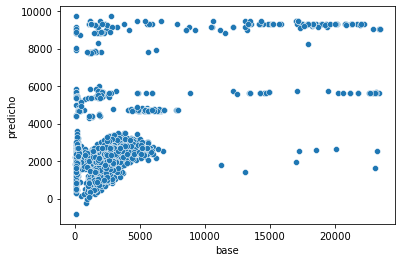

In [240]:
sns.scatterplot(data= comp_pred, x='base', y='predicho')

## Prueba de eliminar los valores muy grandes de USD_m2

In [244]:
df_bajos = df2[df2['price_usd_per_m2']<10000]

In [269]:
df_conv = df_bajos[['property_type','place_name','surface_total_in_m2','rooms','tiene_jardin','tiene_cochera','tiene_pileta','tiene_parrilla','cuota','price_usd_per_m2']]

In [270]:
df_conv = df_conv.astype({'tiene_jardin':'boolean','tiene_cochera':'boolean','tiene_pileta':'boolean','tiene_parrilla':'boolean','cuota':'boolean'})
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15242 entries, 19 to 121138
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        15242 non-null  object 
 1   place_name           15242 non-null  object 
 2   surface_total_in_m2  15242 non-null  float64
 3   rooms                15242 non-null  float64
 4   tiene_jardin         15242 non-null  boolean
 5   tiene_cochera        15242 non-null  boolean
 6   tiene_pileta         15242 non-null  boolean
 7   tiene_parrilla       15242 non-null  boolean
 8   cuota                15242 non-null  boolean
 9   price_usd_per_m2     15242 non-null  float64
dtypes: boolean(5), float64(3), object(2)
memory usage: 863.3+ KB


In [271]:
df_conv.head()

,property_type,place_name,surface_total_in_m2,rooms,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla,cuota,price_usd_per_m2
19,apartment,Palermo,104.0,3.0,True,False,False,False,False,3365.384615
21,apartment,Palermo,118.0,4.0,False,False,False,False,False,2292.372881
29,apartment,Flores,43.0,2.0,False,False,False,False,False,1744.186047
35,apartment,Boedo,80.0,4.0,False,False,False,False,False,1812.500000
48,apartment,Balvanera,141.0,5.0,True,True,False,False,False,1702.127660


In [272]:
df_conv['sup_raiz_cuadrada'] = np.sqrt(df_conv['surface_total_in_m2'])
df_conv['sup_raiz_cubica'] = np.cbrt(df_conv['surface_total_in_m2'])

In [273]:
df_conv

,property_type,place_name,surface_total_in_m2,rooms,tiene_jardin,tiene_cochera,tiene_pileta,tiene_parrilla,cuota,price_usd_per_m2,sup_raiz_cuadrada,sup_raiz_cubica
19,apartment,Palermo,104.0,3.0,True,False,False,False,False,3365.384615,10.198039,4.702669
21,apartment,Palermo,118.0,4.0,False,False,False,False,False,2292.372881,10.862780,4.904868
29,apartment,Flores,43.0,2.0,False,False,False,False,False,1744.186047,6.557439,3.503398
35,apartment,Boedo,80.0,4.0,False,False,False,False,False,1812.500000,8.944272,4.308869
48,apartment,Balvanera,141.0,5.0,True,True,False,False,False,1702.127660,11.874342,5.204828
...,...,...,...,...,...,...,...,...,...,...,...,...
121077,apartment,Belgrano,70.0,2.0,False,True,False,False,False,2428.571429,8.366600,4.121285
121094,apartment,Belgrano,84.0,4.0,False,True,False,False,False,2595.238095,9.165151,4.379519
121113,apartment,Palermo,100.0,3.0,True,True,True,True,False,2650.000000,10.000000,4.641589
121131,apartment,Recoleta,113.0,4.0,False,False,False,False,False,2876.106195,10.630146,4.834588


In [274]:
numericals = ['surface_total_in_m2','sup_raiz_cuadrada', 'sup_raiz_cubica']

Z = df_conv[numericals]
scaler = MinMaxScaler()
scaler.fit(Z)

df_conv[numericals] = scaler.transform(Z)


## Modelo

In [276]:
# Selecciono las columnas que considero features para modelar 
X = df_conv.loc[:,['property_type','place_name', 'rooms','tiene_jardin', 'tiene_cochera', 'tiene_pileta', 'tiene_parrilla', 'cuota','surface_total_in_m2','sup_raiz_cuadrada','sup_raiz_cubica']]
y = df_conv['price_usd_per_m2']

# Convierto a dummies las categóricas
X = pd.get_dummies(X,drop_first=True)

# Separo en train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33)

X.shape, y.shape, X_train.shape,X_test.shape, y_train.shape, y_test.shape

((15242, 34), (15242,), (11431, 34), (3811, 34), (11431,), (3811,))

In [277]:
#prueba con crossvalidation con Ridge
rcv = RidgeCV(alphas=(0.0001,0.001,0.01,0.1,1,10,100,1000,10000), cv=5)

rcv.fit(X_train,y_train)
print('intercept: ',rcv.intercept_,'coef: ', rcv.coef_,'alpha: ', rcv.alpha_)

y_pred_rcv = rcv.predict(X_test)

metrics.r2_score(y_test, y_pred_rcv)

intercept:  3853.736922307365 coef:  [ 2.89003576e+00 -1.73761654e+02  4.23604623e+01  5.75224516e+02
 -8.59879740e+01  1.80800189e+02 -1.44551790e+04  5.41333754e+04
 -4.29377656e+04  5.35266360e+02 -2.53432818e+02 -3.36881678e+02
 -1.41371710e+02  8.09721956e+02  5.48645754e+02  2.81927994e+02
  2.70621834e+01  9.80140240e+01 -2.77282343e+02 -4.98956103e+02
 -8.25109842e+02  2.98408317e+02  5.02740123e+02  1.08770054e+03
  2.44889465e+03  8.56441360e+02 -1.59375501e+02 -2.16408337e+02
 -1.76668213e+02  3.35900564e+02 -1.90788117e+02 -1.10640095e+02
  8.10898922e+00  4.01686505e+01] alpha:  0.0001


0.1935729416744706

<AxesSubplot:xlabel='base', ylabel='predicho'>

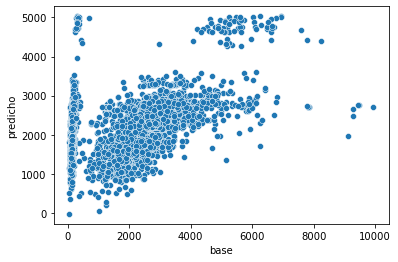

In [279]:
comp_pred = pd.DataFrame({'base':y_test,'predicho':y_pred_rcv})
sns.scatterplot(data= comp_pred, x='base', y='predicho')

# Gráficos

In [ ]:
#superficie total contra precio de la propiedad.
sns.scatterplot(data=df_port_std, x='price_usd_per_m2', y='price_usd_per_m2_predic_std')


In [ ]:
#Precio por m2 vs superficie total

sns.scatterplot(data=df_port_std, x='surface_total_in_m2', y='price_usd_per_m2')
plt.ylim(0,25000)

In [ ]:
#Precio por m2 predicho vs superficie total

sns.scatterplot(data=df_port_std, x='surface_total_in_m2', y='price_usd_per_m2_predic_std')
plt.ylim(0,25000)

In [ ]:
df2.columns

In [ ]:
# Apartir de "df2" con los ultimos destiles e imputaciones realizados sobre "df"
# y a partir tambien de un jointplot en "df" que perdi en el que a ojo selecciones las columnas relevantes; 2, 3, 4 y 5
#df2

df3 = df2.iloc[:,[2,3,4,6,5]]
df3

# vemos entre cuales variables existe correlacion relevante.

sns.pairplot(df3);


In [ ]:
# Tomando aquellas con mayor coeficiente de correlatividad : graficos particulares aislados.

# Precio por metro contra total de la Propiedad.
df4 = df3.loc[:,['price_usd_per_m2','price_aprox_usd']]
df4 = sns.FacetGrid(df3)
graf_1 = df4.map(sns.scatterplot, "price_aprox_usd", "price_usd_per_m2")

In [ ]:
# m^2 totales contra precio total de la propiedad.
df5 = df3.loc[:,['price_usd_per_m2','surface_total_in_m2']]
df5 = sns.FacetGrid(df3)
graf_2 = df5.map(sns.scatterplot,"surface_total_in_m2","price_usd_per_m2" )

In [ ]:
#superficie total contra precio de la propiedad.
df6 = df3.loc[:,['surface_covered_in_m2','price_usd_per_m2']]
df6 = sns.FacetGrid(df3)
graf_3 = df6.map(sns.scatterplot,"surface_covered_in_m2","price_usd_per_m2")

In [ ]:
df2.info()

In [ ]:
df_cor = df2.copy()
plt.figure(figsize=(9,8))
corr = df_cor.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cbar=False)
plt.show()

In [75]:
# Seleccionar mediante muestreo aleatorio simple una submuestra de 100 (cambiar la columna seleccionada por la columna 
# del modelo, utilicé el precio aproximado en usd ya que posteriormente vamos a estimar un precio en función del precio/m2 
# y la superficie)
df_port_std = df2.copy()
portafolio = df_port_std['price_aprox_usd'].sample(100)
portafolio

# Determinar capital inicial

cap_inicial = portafolio.sum()
print('Nuestro capital inicial es: ', cap_inicial)
#display(df_port.loc[:,'price_usd_per_m2'])
#Se agrega la columna predicha al DF
df_port_std.loc[:,'price_usd_per_m2_predic_std'] = price_usd_per_m2_predic_std

# Determinar el error del precio de las propiedades 

# Se crea una columna con el precio de predicción
# (Cambiar los nombres de las columnas por los nombres de las columnas del modelo)
df_port_std.loc[:,'price_aprox_usd_predic_std'] = df_port.apply((lambda row: row['price_usd_per_m2_predic_std']*row['surface_total_in_m2']), axis=1)

# Se crea una columna con la diferencia entre el precio real y el precio estimado por el modelos. 
# Se normaliza el error dividiendo por el precio real (cambiar los nombres de las variables)

df_port_std.loc[:,'error_normalizado'] = df_port.apply((lambda row: (row['price_aprox_usd_predic_std']-row['price_aprox_usd'])/row['price_aprox_usd']), axis=1)

# Se genera una máscara con los índice de las 100 propiedades que más se alejan del valor predicho, con diferencia negativa
menor_error_mask_std= df_port['error_normalizado'].sort_values(ascending=False).index

# Se crea una columna auxiliar con los valores de las propiedades predichas ordenadas de menor a mayor.
prop_menor_precio = df_port.loc[menor_error_mask_std,'price_aprox_usd_predic_std']

# Creo una variable y voy sumando el precio de las propiedades más baratas hasta llegar al valor de capital inicial, se cuenta la cantidad de propiedades que se pueden comprar
cap_menor = 0
cant_prop = 0

for x in prop_menor_precio.index:
    if cap_menor < cap_inicial:
        cap_menor = cap_menor + x
        cant_prop = cant_prop + 1

cap_menor = cap_menor - prop_menor_precio.iloc[cant_prop]
cant_prop = cant_prop-1
    
print(f'La cantidad de propiedades que se puede comprar es {cant_prop}, el capital necesario es {cap_menor}')

Nuestro capital inicial es:  22006162.54


KeyError: 'price_usd_per_m2_predic_std'